In [2]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
import tensorflow as tf
from skimage.feature import hog
from matplotlib import patches
from sklearn.datasets import fetch_openml
import numpy as np
import pickle
import pandas as pd
import cv2
pd.set_option('display.max_columns', None)
import math
import datetime

In [11]:
mnist = fetch_openml('mnist_784', data_home="dataset")

x = np.array(mnist.data, 'int16')
y = np.array(mnist.target, 'int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_val:', x_val.shape)
print('y_val:', y_val.shape)
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

X_train: (42000, 784)
y_train: (42000,)
X_val: (14000, 784)
y_val: (14000,)
X_test: (14000, 784)
y_test: (14000,)


In [13]:
x_train_re = x_train.reshape(42000, 28, 28)
y_train_re = y_train
x_val_re = x_val.reshape(14000, 28, 28)
y_val_re = y_val
x_test_re = x_test.reshape(14000, 28, 28)
y_test_re = y_test

In [14]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_val_re.shape)
print('y_validation:', y_val_re.shape)
print('x_test:', x_test_re.shape)
print('y_test:', y_test_re.shape)
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

x_train: (42000, 28, 28)
y_train: (42000,)
x_validation: (14000, 28, 28)
y_validation: (14000,)
x_test: (14000, 28, 28)
y_test: (14000,)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [39]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,36,123,253,253,227,104,18,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,78,155,242,253,252,252,252,252,199,21,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,232,252,252,253,252,233,231,249,253,202,11,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,232,252,252,199,84,7,43,221,253,252,21,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,188,252,121,18,0,0,169,252,253,182,4,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,68,201,253,253,230,27,0,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train_re[0]

3

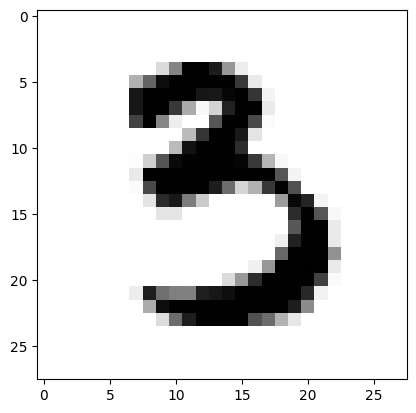

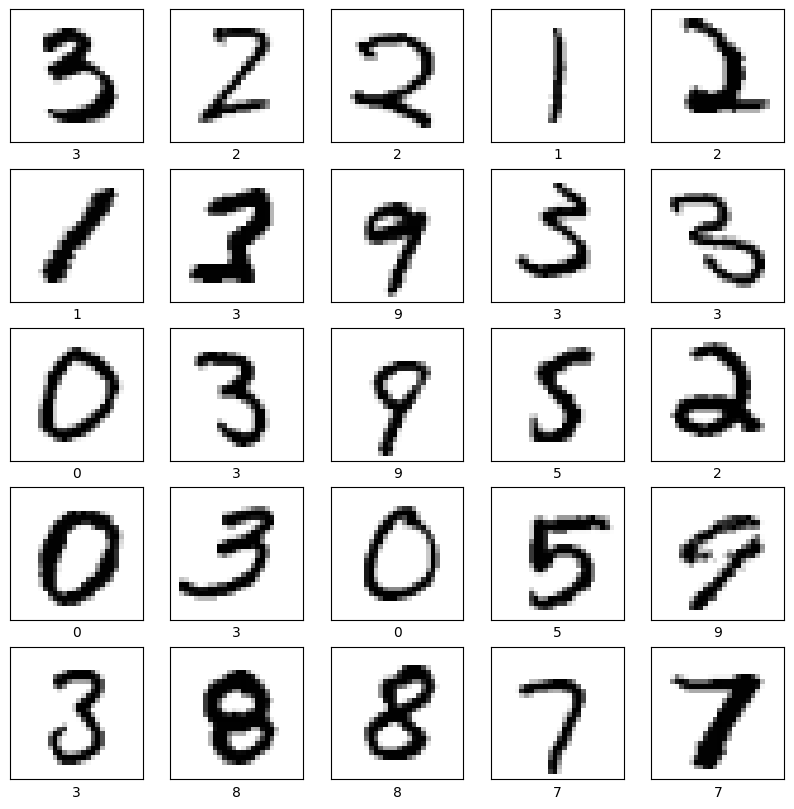

In [44]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()
# Let's print some more training examples to get the feeling of how the digits were written.
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [15]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_val_with_chanels = x_val_re.reshape(
    x_val_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_val_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (42000, 28, 28, 1)
x_validation_with_chanels: (14000, 28, 28, 1)
x_test_with_chanels: (14000, 28, 28, 1)


In [16]:
x_train_normalized = x_train_with_chanels / 255
x_val_normalized = x_val_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [44]:
model = tf.keras.models.Sequential()

# Convolutional layers
model.add(tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=3,
    strides=1,
    activation='relu',
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_initializer='he_normal'
))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    activation='relu',
    kernel_initializer='he_normal'
))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=256,
    activation='relu',
    kernel_initializer='he_normal'
))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(
    units=128,
    activation='relu',
    kernel_initializer='he_normal'
))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation='softmax',
    kernel_initializer='he_normal'
))


In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)       128       
 hNormalization)                                                 
                                                      

In [46]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [47]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_val_normalized, y_val_re),
    callbacks=[tensorboard_callback]
)
print("The model has successfully trained")

Epoch 1/10
1313/1313 [==============================] - 15s 9ms/step - loss: 0.2088 - accuracy: 0.9357 - val_loss: 0.0766 - val_accuracy: 0.9751
Epoch 2/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0856 - accuracy: 0.9732 - val_loss: 0.0598 - val_accuracy: 0.9814
Epoch 3/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0662 - accuracy: 0.9790 - val_loss: 0.0513 - val_accuracy: 0.9839
Epoch 4/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0516 - accuracy: 0.9835 - val_loss: 0.0436 - val_accuracy: 0.9868
Epoch 5/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0452 - val_accuracy: 0.9879
Epoch 6/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0462 - val_accuracy: 0.9866
Epoch 7/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0363 - accuracy: 0.9878 - val_loss: 0.0462 - val_ac

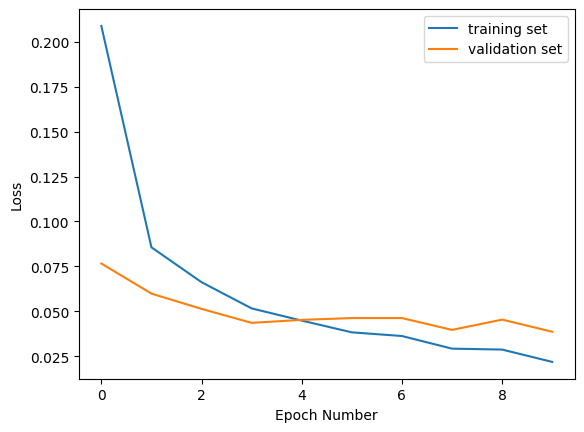

In [48]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

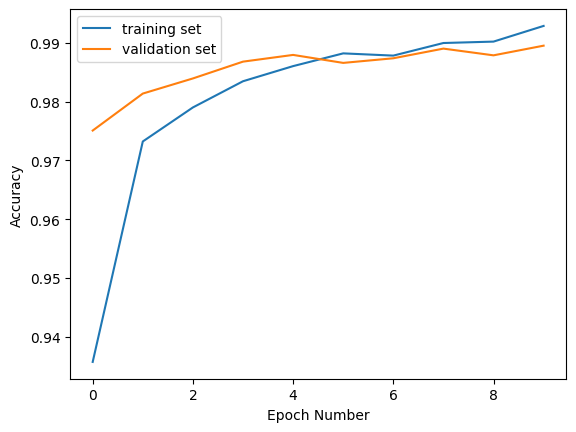

In [49]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [50]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0081 - accuracy: 0.9971
Train loss:  0.008125138469040394
Train accuracy:  0.9971428513526917


In [51]:
validation_loss, validation_accuracy = model.evaluate(x_val_normalized, y_val_re)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

438/438 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9895
Validation loss:  0.0386318564414978
Validation accuracy:  0.9894999861717224


In [52]:
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_re)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

438/438 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9885
Test loss:  0.03924032673239708
Test accuracy:  0.9884999990463257


In [53]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)

438/438 [==============================] - 1s 2ms/step


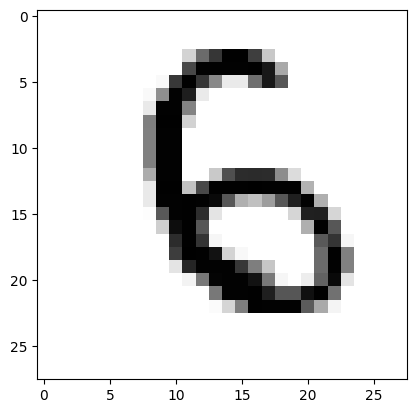

In [54]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)
# Show the predicted image
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

<ipython-input-55-b8b14f4eacf6>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


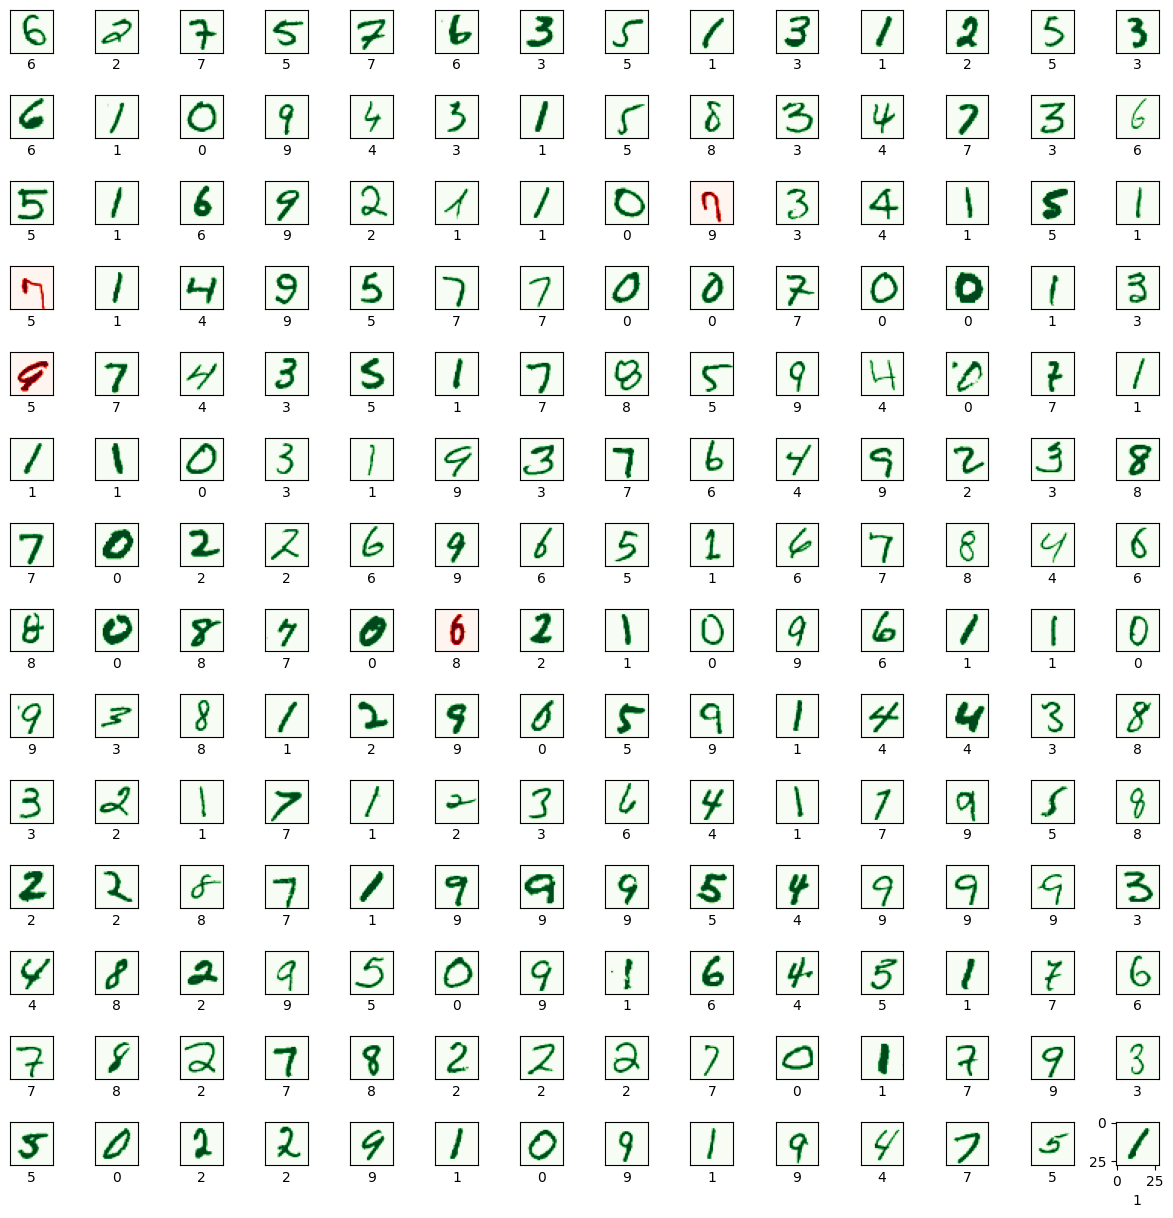

In [55]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))
for plot_index in range(numbers_to_display):
 predicted_label = predictions[plot_index]
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 color_map = 'Greens' if predicted_label == y_test_re[plot_index] else 'Reds'
 plt.subplot(num_cells, num_cells, plot_index + 1)
 plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
 plt.xlabel(predicted_label)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

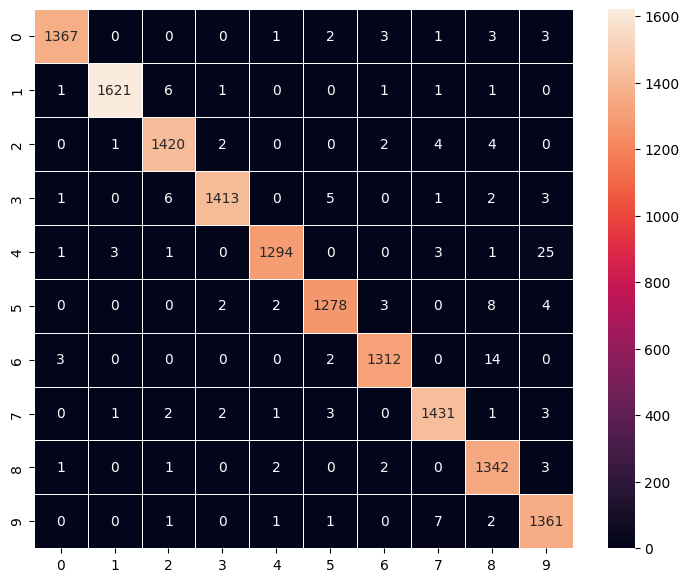

In [57]:
import seaborn as sn
confusion_matrix = tf.math.confusion_matrix(y_test_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()